In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ctest=pd.read_csv(r'C:\Users\Keshav\Desktop\application_test.csv')

In [3]:
ctrain=pd.read_csv(r'C:\Users\Keshav\Desktop\application_train.csv')

In [4]:
ctrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
ctest.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ctrain.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
ctest.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [8]:
ctrain.shape

(307511, 122)

In [9]:
ctest.shape

(48744, 121)

In [10]:
ctrain.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

# Exploratory Data Analysis

(array([282686.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  24825.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

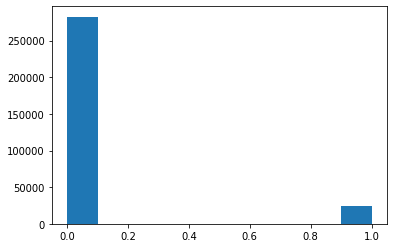

In [11]:
plt.hist(ctrain['TARGET'])

In [12]:
ctrain['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [13]:
missing=ctrain.isnull().sum()

In [14]:
type(missing)

pandas.core.series.Series

In [15]:
missing.sort_values(ascending=False)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
                                ...  
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
HOUR_APPR_PROCESS_START             0
SK_ID_CURR                          0
Length: 122, dtype: int64

In [16]:
missing.unique()

array([     0,     12,    278,   1292, 202929,  96391,      2, 173378,
          660,  60965, 156061, 179943, 150007, 204488, 214865, 163891,
       154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682,
       210295, 154297, 148431, 156341, 145755,   1021,      1,  41519],
      dtype=int64)

In [17]:
missing.nunique()

32

In [18]:
#percentage
missingp=(missing.sort_values(ascending=False)/307511)*100
#missingp=(missing.sort_values(ascending=False)/len(ctrain))*100

In [19]:
missingp

COMMONAREA_MEDI                69.872297
COMMONAREA_AVG                 69.872297
COMMONAREA_MODE                69.872297
NONLIVINGAPARTMENTS_MODE       69.432963
NONLIVINGAPARTMENTS_MEDI       69.432963
                                 ...    
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
SK_ID_CURR                      0.000000
Length: 122, dtype: float64

In [20]:
# better code 
missingp1=ctrain.isnull().mean()

In [21]:
missingp1.sort_values(ascending=False)

COMMONAREA_MEDI                0.698723
COMMONAREA_AVG                 0.698723
COMMONAREA_MODE                0.698723
NONLIVINGAPARTMENTS_MODE       0.694330
NONLIVINGAPARTMENTS_MEDI       0.694330
                                 ...   
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
SK_ID_CURR                     0.000000
Length: 122, dtype: float64

In [22]:
missingdf=pd.concat([missing,missingp],axis=1)

C:\Users\Keshav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [23]:
missingdf

,0,1
AMT_ANNUITY,12,0.003902
AMT_CREDIT,0,0.000000
AMT_GOODS_PRICE,278,0.090403
AMT_INCOME_TOTAL,0,0.000000
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
...,...,...
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019
YEARS_BUILD_AVG,204488,66.497784
YEARS_BUILD_MEDI,204488,66.497784


In [24]:
missingdf=missingdf.rename(columns={0:'Missing Values',1:'%age Missing'})

In [25]:
missingdf

,Missing Values,%age Missing
AMT_ANNUITY,12,0.003902
AMT_CREDIT,0,0.000000
AMT_GOODS_PRICE,278,0.090403
AMT_INCOME_TOTAL,0,0.000000
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
...,...,...
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019
YEARS_BUILD_AVG,204488,66.497784
YEARS_BUILD_MEDI,204488,66.497784


In [26]:
missingdf=missingdf[missingdf.iloc[:,1]!=0].sort_values('%age Missing',ascending=False).round(1)

In [27]:
missingdf

,Missing Values,%age Missing
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [28]:
#code for production
def missing_value_table(df):
    m1=df.isnull().sum()
    m2=m1/len(ctrain)*100
    missingt=pd.concat([m1,m2],axis=1)
    missingt=missingt.rename(columns={0:'totalmissing',1:'%age missing'})
    missingt=missingt[missingt['totalmissing']!=0].sort_values('%age missing',ascending=False).round(1)
    print('out of' +' '+  str(df.shape[1])+ " " + 'columns having missing values are'+ ' ' + str(missingt.shape[0]))
    return(missingt)

In [29]:
missingtable=missing_value_table(ctrain)
missingtable.head(20)

out of 122 columns having missing values are 67


,totalmissing,%age missing
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


# Dealing with categorical variables

The problem with label encoding is that it gives the categories an arbitrary ordering. The value assigned to each of the categories is random and does not reflect any inherent aspect of the category. In the example above, programmer recieves a 4 and data scientist a 1, but if we did the same process again, the labels could be reversed or completely different. The actual assignment of the integers is arbitrary. Therefore, when we perform label encoding, the model might use the relative value of the feature (for example programmer = 4 and data scientist = 1) to assign weights which is not what we want. If we only have two unique values for a categorical variable (such as Male/Female), then label encoding is fine, but for more than 2 unique categories, one-hot encoding is the safe option.

There is some debate about the relative merits of these approaches, and some models can deal with label encoded categorical variables with no issues. Here is a good Stack Overflow discussion. I think (and this is just a personal opinion) for categorical variables with many classes, one-hot encoding is the safest approach because it does not impose arbitrary values to categories. The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by PCA or other dimensionality reduction methods to reduce the number of dimensions (while still trying to preserve information).

In [30]:
ctrain.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [31]:
ctrain.select_dtypes('object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [32]:
ctrain.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [33]:
#lABEL Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
le_count = 0

# Iterate through the columns
for col in ctrain:
    if ctrain[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(ctrain[col].unique())) <= 2:
            # Train on the training data
            le.fit(ctrain[col])
            # Transform both training and testing data
            ctrain[col] = le.transform(ctrain[col])
            ctest[col] = le.transform(ctest[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [35]:
ctrain.dtypes.value_counts()

float64    65
int64      41
object     13
int32       3
dtype: int64

In [36]:
ctrain=pd.get_dummies(ctrain)
ctest=pd.get_dummies(ctest)
print('Feature Shape of test data:',ctrain.shape)
print('Feature Shape train data:',ctest.shape)

Feature Shape of test data: (307511, 243)
Feature Shape train data: (48744, 239)


# Aligning Training and Testing Data

In [37]:
Target=ctrain['TARGET']
#align
ctrain,ctest=ctrain.align(ctest,join='inner',axis=1)
ctrain['TARGET']=Target
print(ctrain.shape)
print(ctest.shape)

(307511, 240)
(48744, 239)


# Handling Outliers

# Outlier Detection with Standard Deviation

# Outlier Detection with Percentiles

# An Outlier Dilemma: Drop or Cap


In [38]:
stats=ctrain.describe()

In [39]:
stats

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,...,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570,0.080729
std,102790.175348,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,...,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679,0.272419
min,100002.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,456255.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
stats.iloc[:,0:10]

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000
mean,278180.518577,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868
std,102790.175348,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831
min,100002.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006
50%,278202.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850
75%,367142.500000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663
max,456255.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508


In [41]:
stats.iloc[:,10:20]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE
count,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066
std,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,-7489.000000,365243.000000,0.000000,0.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
(ctrain['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Text(0, 0.5, 'Frequency')

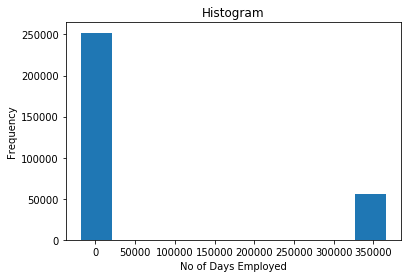

In [43]:
plt.hist(ctrain['DAYS_EMPLOYED'])
plt.title('Histogram')
plt.xlabel('No of Days Employed')
plt.ylabel('Frequency')

In [44]:
an=ctrain[ctrain['DAYS_EMPLOYED']==365243]
nan=ctrain[ctrain['DAYS_EMPLOYED']!=365243]
print('%age of defaulters in an:',an['TARGET'].mean()*100)
print('%age of defaulters in nan:',nan['TARGET'].mean()*100)
print('There are %d analomous days of employment'%len(an))

%age of defaulters in an: 5.399646043269405
%age of defaulters in nan: 8.65997453765215
There are 55374 analomous days of employment


In [45]:
ctrain[ctrain['DAYS_EMPLOYED']==365243]

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
8,100011,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,0.018634,...,0,0,0,0,0,0,0,0,0,0
11,100015,0,0,1,0,38419.155,148365.0,10678.5,135000.0,0.015221,...,0,0,0,0,0,0,0,0,0,0
23,100027,0,0,1,0,83250.000,239850.0,23850.0,225000.0,0.006296,...,0,1,0,0,0,0,0,1,0,0
38,100045,0,0,1,0,99000.000,247275.0,17338.5,225000.0,0.006207,...,0,0,0,0,0,1,0,1,0,0
43,100050,0,0,1,0,108000.000,746280.0,42970.5,675000.0,0.010966,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,0,1,0,202500.000,703728.0,29943.0,607500.0,0.031329,...,0,0,0,0,0,1,0,1,0,0
307483,456227,0,0,1,0,99000.000,247275.0,16479.0,225000.0,0.007330,...,0,0,0,0,0,1,0,1,0,0
307487,456231,0,0,1,0,117000.000,1071909.0,31473.0,936000.0,0.010147,...,0,0,0,0,0,0,0,0,0,0
307505,456249,0,0,1,0,112500.000,225000.0,22050.0,225000.0,0.022800,...,0,0,0,0,1,0,0,1,0,0


In [46]:
    if ctrain.loc[:,'DAYS_EMPLOYED']==365243:
        ctrain['Employed']=1
        ctrain['DAYS_EMPLOYED']=np.nan
    else:
        ctrain['Employed']=0

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Text(0.5, 0, 'Days_Emp')

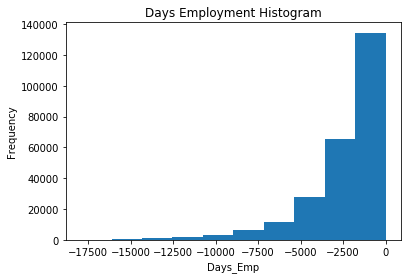

In [47]:
ctrain['ana']=ctrain['DAYS_EMPLOYED']==365423
ctrain['DAYS_EMPLOYED']=ctrain['DAYS_EMPLOYED'].replace({365243:np.nan})
ctrain['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
#plt.hist(ctrain['DAYS_EMPLOYED'])
plt.xlabel('Days_Emp')

In [48]:
ctest['ana']=ctest['DAYS_EMPLOYED']==365423
ctest['DAYS_EMPLOYED']=ctest['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

# Before feature selection we have do imputation

In [69]:
df=ctrain


In [72]:
y=df['TARGET']
x=df.drop(['TARGET'],axis=1)

In [73]:
from sklearn.preprocessing import Imputer

im=Imputer(strategy='median')

im.fit(x)

x=im.transform(x)

C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Feature selection

# 1. Univariate Selection

In [49]:
ctrain

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,ana
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,1,0,1,0,1,False
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,0,0,1,0,0,False
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,0,0,0,0,1,0,1,0,0,False
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,0,0,0,0,1,0,1,0,0,False
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0,0,0,1,0,0,1,0,0,False
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,0,0,0,0,1,0,1,0,1,False


# CHI SQUARED TEST

In [95]:
df=ctrain

In [97]:
for col in df:
    if df[col].mean()<0:
        print(col)

In [98]:
df['DAYS_BIRTH']=abs(df['DAYS_BIRTH'])

In [99]:
df['DAYS_EMPLOYED']=abs(df['DAYS_EMPLOYED'])
df['DAYS_REGISTRATION']=abs(df['DAYS_REGISTRATION'])
df['DAYS_ID_PUBLISH']=abs(df['DAYS_ID_PUBLISH'])
df['DAYS_LAST_PHONE_CHANGE']=abs(df['DAYS_LAST_PHONE_CHANGE'])

In [100]:
df.shape

(307511, 241)

In [101]:
df.dtypes.value_counts()

uint8      131
float64     66
int64       40
int32        3
bool         1
dtype: int64

In [102]:
#Before feature selection we have do imputation
y=df['TARGET']
x=df.drop(['TARGET'],axis=1)

from sklearn.preprocessing import Imputer

im=Imputer(strategy='median')

im.fit(x)

x=im.transform(x)

C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [103]:
x1=pd.DataFrame(x,columns=z.columns)

In [104]:
x1

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ana
0,100002.0,0.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,100003.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,100004.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,0.0,0.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
307507,456252.0,0.0,0.0,1.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
307508,456253.0,0.0,0.0,1.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
307509,456254.0,0.0,0.0,1.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [105]:
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import  f_classif
X_new=SelectKBest(score_func=chi2,k=2).fit_transform(x1,y)
X_new1=SelectKBest(score_func=f_classif,k=2).fit_transform(x1,y)

C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [239] are constant.
  UserWarning)
C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [80]:
X_new1

array([[0.26294859, 0.13937578],
       [0.62224578, 0.53527625],
       [0.55591208, 0.72956669],
       ...,
       [0.53572175, 0.21885908],
       [0.51416282, 0.66102354],
       [0.7085689 , 0.1139224 ]])

In [79]:
X_new

array([[ 406597.5,  351000. ],
       [1293502.5, 1129500. ],
       [ 135000. ,  135000. ],
       ...,
       [ 677664. ,  585000. ],
       [ 370107. ,  319500. ],
       [ 675000. ,  675000. ]])

In [58]:
z=df.drop(['TARGET'],axis=1)

In [59]:
z

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ana
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,False
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,0,0,0,0,0,1,0,1,0,False
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,0,0,0,0,0,1,0,1,0,False
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0,0,0,0,1,0,0,1,0,False
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,0,0,0,0,0,1,0,1,0,False


# ANOVA FEATURE SELECTION

In [85]:
bestfeatures = SelectKBest(score_func=f_classif, k=20)
fit = bestfeatures.fit(x1,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(z.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(40,'Score'))  #print 10 best features

C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [239] are constant.
  UserWarning)
C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


                                                 Specs        Score
32                                        EXT_SOURCE_2  8109.633923
33                                        EXT_SOURCE_3  7659.288339
31                                        EXT_SOURCE_1  3036.690452
10                                          DAYS_BIRTH  1893.976087
11                                       DAYS_EMPLOYED  1239.785557
23                         REGION_RATING_CLIENT_W_CITY  1144.461405
22                                REGION_RATING_CLIENT  1070.491250
123                           NAME_INCOME_TYPE_Working  1019.404570
125               NAME_EDUCATION_TYPE_Higher education   988.031888
81                              DAYS_LAST_PHONE_CHANGE   940.478790
109                                      CODE_GENDER_M   923.285127
108                                      CODE_GENDER_F   922.993051
13                                     DAYS_ID_PUBLISH   816.396507
29                              REG_CITY_NOT_WOR

# CHI SQUARED TEST

In [84]:
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(x1,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(z.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                                    Specs         Score
8                         AMT_GOODS_PRICE  1.223080e+08
6                              AMT_CREDIT  7.669987e+07
11                          DAYS_EMPLOYED  2.502588e+06
10                             DAYS_BIRTH  2.235391e+06
5                        AMT_INCOME_TOTAL  1.624102e+06
12                      DAYS_REGISTRATION  1.348566e+06
81                 DAYS_LAST_PHONE_CHANGE  6.656876e+05
13                        DAYS_ID_PUBLISH  6.195946e+05
7                             AMT_ANNUITY  3.913092e+05
0                              SK_ID_CURR  5.192425e+04
125  NAME_EDUCATION_TYPE_Higher education  7.451081e+02
29                 REG_CITY_NOT_WORK_CITY  6.153774e+02
109                         CODE_GENDER_M  6.060355e+02
32                           EXT_SOURCE_2  5.594802e+02
28                 REG_CITY_NOT_LIVE_CITY  5.587089e+02
119            NAME_INCOME_TYPE_Pensioner  5.384165e+02
222                 ORGANIZATION_TYPE_XNA  5.332

# 2. Feature Importance

C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.88594380e-02 3.18224839e-03 8.32275020e-03 1.05785511e-02
 1.11625060e-02 1.84000234e-02 1.80706066e-02 1.81078128e-02
 1.76190069e-02 1.83420619e-02 2.02798445e-02 1.59257577e-02
 1.93043341e-02 2.00979374e-02 1.04627732e-02 0.00000000e+00
 1.13676413e-03 8.12197243e-03 4.26256156e-04 8.72463142e-03
 4.55820527e-03 1.21516129e-02 6.97887583e-03 6.59444342e-03
 1.82195792e-02 1.70245795e-03 3.15911518e-03 2.72632167e-03
 4.83009170e-03 6.54165112e-03 6.49422020e-03 1.78752979e-02
 3.15951010e-02 3.22424696e-02 4.94287577e-03 4.87677810e-03
 5.74755572e-03 4.52646691e-03 4.36377549e-03 2.66147798e-03
 4.82395777e-03 4.13298447e-03 3.32818753e-03 5.38444775e-03
 4.11713470e-03 5.72823818e-03 2.98634388e-03 4.74511459e-03
 5.19157553e-03 4.85690934e-03 5.76742858e-03 4.53107789e-03
 4.36498924e-03 2.20347052e-03 4.66861545e-03 3.92825796e-03
 3.67246297e-03 5.13640421e-03 4.17555060e-03 5.27944497e-03
 2.94130694e-03 4.50471888e-03 5.02558027e-03 4.91469399e-03
 5.66057060e-03 4.631325

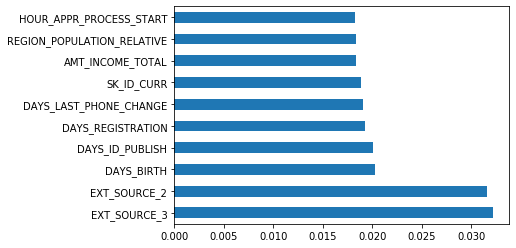

In [106]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=z.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Correlations(Generally for linear relationship)

In [45]:
correlation=ctrain.corr()['TARGET'].sort_values()
print('Most positive correlation:\n',correlation.tail(10))
print('Most negetive correlation:\n',correlation.head(10))

Most positive correlation:
 DAYS_ID_PUBLISH                0.051457
CODE_GENDER_M                  0.054713
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
ana                                 NaN
Name: TARGET, dtype: float64
Most negetive correlation:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
Name: TARGET, dtype: floa

# Let us analyze the most important feature we got from above analysis

# Effect of Age on Repayment

In [46]:
ctrain['DAYS_BIRTH']=abs(ctrain['DAYS_BIRTH'])

In [47]:
ctrain['DAYS_BIRTH'].corr(ctrain['TARGET'])

-0.07823930830982712

Text(0, 0.5, 'count')

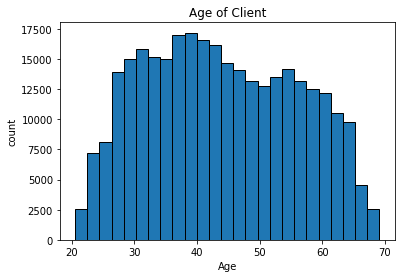

In [48]:
plt.hist(ctrain['DAYS_BIRTH']/365,edgecolor='k',bins=25)
plt.title('Age of Client')
plt.xlabel('Age')
plt.ylabel('count')

Text(0.5, 0, 'Age')

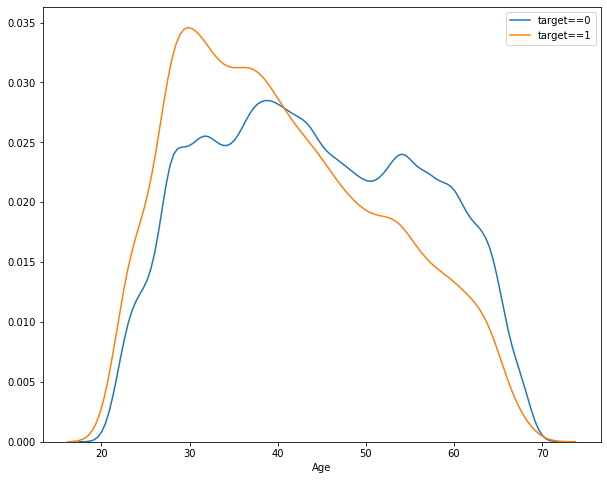

In [53]:
plt.figure(figsize=(10,8))

sns.kdeplot(ctrain.loc[ctrain['TARGET']==0,'DAYS_BIRTH']/365,label='target==0')

sns.kdeplot(ctrain.loc[ctrain['TARGET']==1,'DAYS_BIRTH']/365,label='target==1')

plt.xlabel('Age')


In [112]:
#OVER ALL MEAN AGE
print((ctrain['DAYS_BIRTH'].mean())/365)

43.93697278587161


In [110]:
#MEAN AGE OF GROUP OF PEOPLE ABLE TO REPAY THE LOAN
print((ctrain.loc[ctrain['TARGET']==0,'DAYS_BIRTH'].mean())/365)

44.214181909954014


In [111]:
#MEAN AGE OF GROUP OF PEOPLE NOT ABLE TO REPAY THE LOAN
print((ctrain.loc[ctrain['TARGET']==1,'DAYS_BIRTH'].mean())/365)

40.78035089461849


# 3.Binning

In [113]:
age_analysis=ctrain[['TARGET','DAYS_BIRTH']]
age_analysis['YEAR_BIRTH']=age_analysis['DAYS_BIRTH']/365
age_analysis['year_binned']=pd.cut(age_analysis['YEAR_BIRTH'],bins=np.linspace(20,70,num=11))
age_analysis.head()

C:\Users\Keshav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Keshav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TARGET,DAYS_BIRTH,YEAR_BIRTH,year_binned
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [114]:
age_analysis=age_analysis.groupby('year_binned').mean()
age_analysis

,TARGET,DAYS_BIRTH,YEAR_BIRTH
year_binned,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0, 0.5, 'Failure to repay')

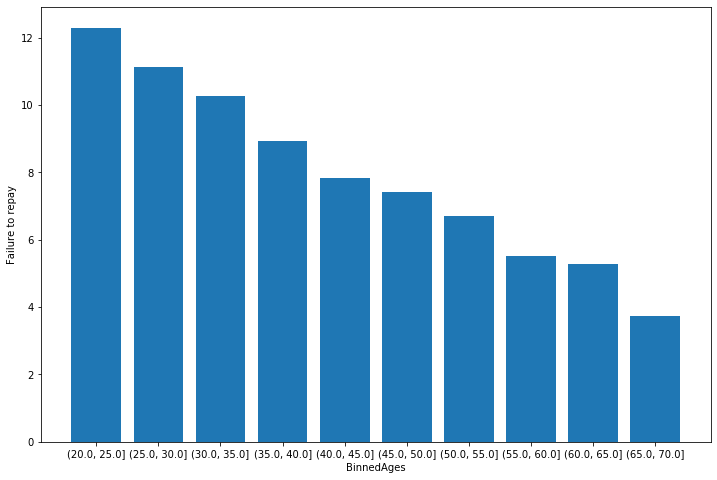

In [115]:
plt.figure(figsize=(12,8))
plt.bar(age_analysis.index.astype(str),age_analysis['TARGET']*100)
plt.xlabel('BinnedAges')
plt.ylabel('Failure to repay')

# Exterior Sources

In [116]:
ext_source=ctrain[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','TARGET']]

In [117]:
ext_source.corr()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,TARGET
EXT_SOURCE_1,1.000000,0.213982,0.186846,0.600610,-0.155317
EXT_SOURCE_2,0.213982,1.000000,0.109167,0.091996,-0.160472
EXT_SOURCE_3,0.186846,0.109167,1.000000,0.205478,-0.178919
DAYS_BIRTH,0.600610,0.091996,0.205478,1.000000,-0.078239
TARGET,-0.155317,-0.160472,-0.178919,-0.078239,1.000000


Text(0.5, 1, 'COORELATION HEATMAP')

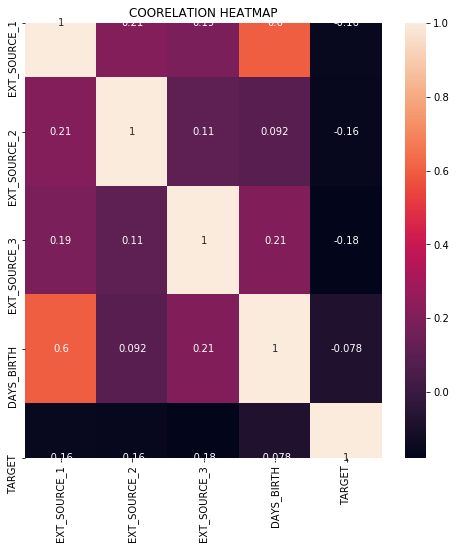

In [59]:
plt.figure(figsize=(8,8))
sns.heatmap(ext_source.corr(),annot=True)
plt.title('COORELATION HEATMAP')

C:\Users\Keshav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Keshav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


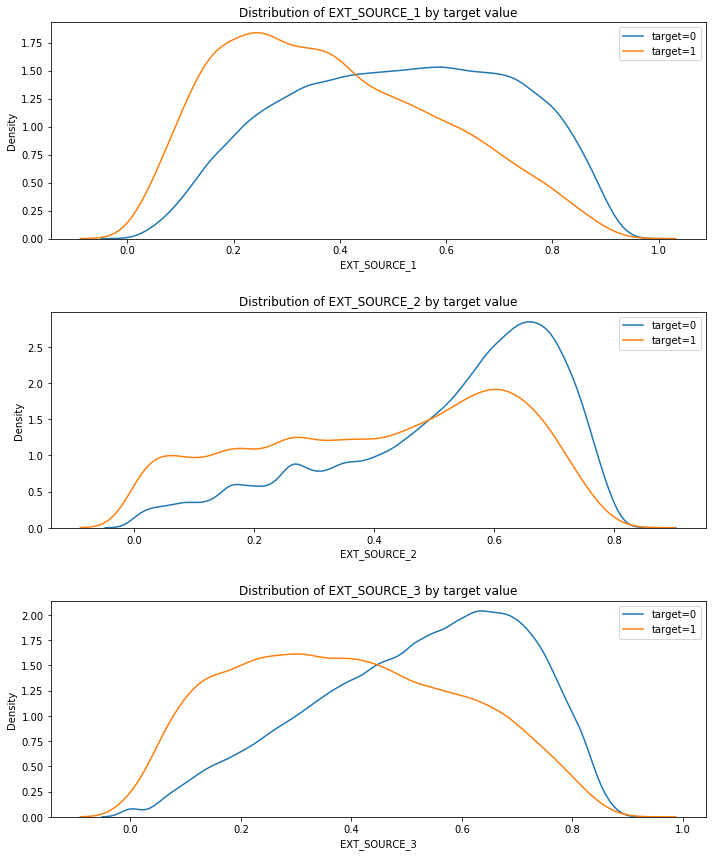

In [60]:
plt.figure(figsize=(10,12))
for i,source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    plt.subplot(3,1,i+1)
    
    sns.kdeplot(ctrain.loc[ctrain['TARGET']==0,source],label='target=0')
    
    sns.kdeplot(ctrain.loc[ctrain['TARGET']==1,source],label='target=1')
    
    plt.title('Distribution of %s by target value'%source)
    
    plt.xlabel('%s'%source)
    
    plt.ylabel('Density')
    
    plt.tight_layout(h_pad = 2.5)

In [61]:
ext_source

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,TARGET
0,0.083037,0.262949,0.139376,9461,1
1,0.311267,0.622246,NaN,16765,0
2,NaN,0.555912,0.729567,19046,0
3,NaN,0.650442,NaN,19005,0
4,NaN,0.322738,NaN,19932,0
...,...,...,...,...,...
307506,0.145570,0.681632,NaN,9327,0
307507,NaN,0.115992,NaN,20775,0
307508,0.744026,0.535722,0.218859,14966,0
307509,NaN,0.514163,0.661024,11961,1


C:\Users\Keshav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Keshav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


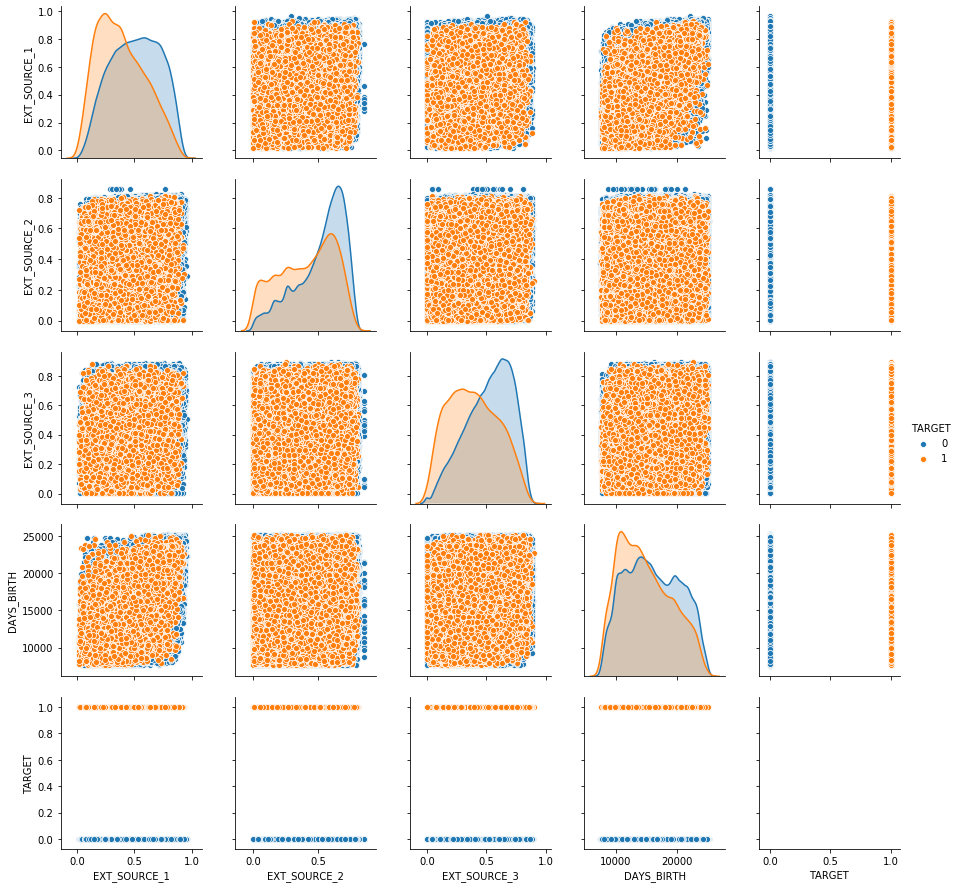

In [62]:
sns.pairplot(ext_source,diag_kind="kde",hue='TARGET')

# REGION_RATING_CLIENT_W_CITY

In [89]:
ctrain['REGION_RATING_CLIENT_W_CITY']

0         2
1         1
2         2
3         2
4         2
         ..
307506    1
307507    2
307508    3
307509    2
307510    1
Name: REGION_RATING_CLIENT_W_CITY, Length: 307511, dtype: int64

Text(0, 0.5, 'count')

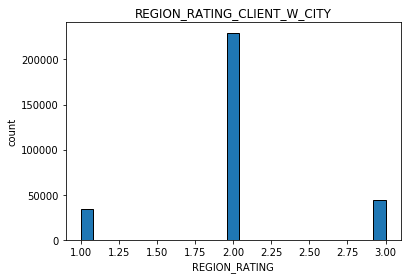

In [90]:
plt.hist(ctrain['REGION_RATING_CLIENT_W_CITY'],edgecolor='k',bins=25)
plt.title('REGION_RATING_CLIENT_W_CITY')
plt.xlabel('REGION_RATING')
plt.ylabel('count')

Text(0.5, 0, 'REGION_RATING_CLIENT_W_CITY')

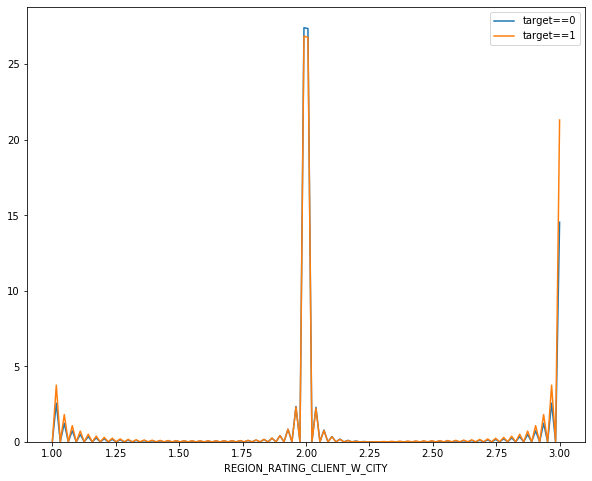

In [91]:
plt.figure(figsize=(10,8))

sns.kdeplot(ctrain.loc[ctrain['TARGET']==0,'REGION_RATING_CLIENT_W_CITY'],label='target==0')

sns.kdeplot(ctrain.loc[ctrain['TARGET']==1,'REGION_RATING_CLIENT_W_CITY'],label='target==1')

plt.xlabel('REGION_RATING_CLIENT_W_CITY')

# REGION_RATING_CLIENT

In [92]:
ctrain['REGION_RATING_CLIENT']

0         2
1         1
2         2
3         2
4         2
         ..
307506    1
307507    2
307508    3
307509    2
307510    1
Name: REGION_RATING_CLIENT, Length: 307511, dtype: int64

Text(0, 0.5, 'count')

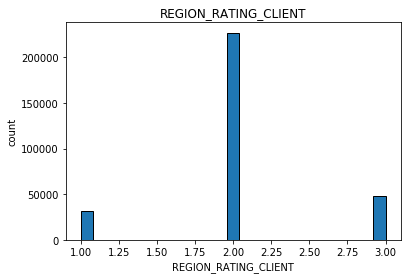

In [93]:
plt.hist(ctrain['REGION_RATING_CLIENT'],edgecolor='k',bins=25)
plt.title('REGION_RATING_CLIENT')
plt.xlabel('REGION_RATING_CLIENT')
plt.ylabel('count')

Text(0.5, 0, 'REGION_RATING_CLIENT')

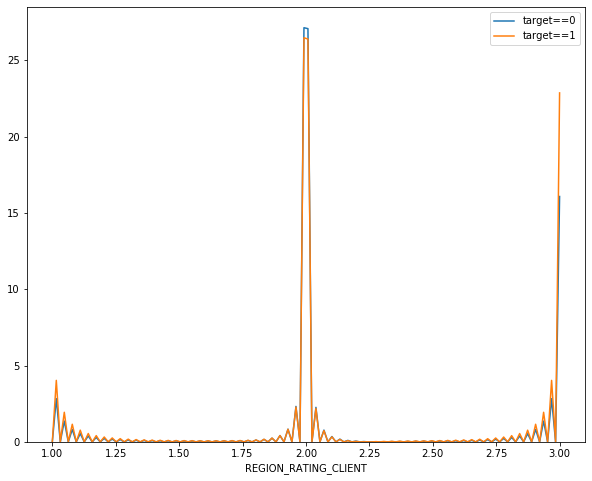

In [94]:
plt.figure(figsize=(10,8))

sns.kdeplot(ctrain.loc[ctrain['TARGET']==0,'REGION_RATING_CLIENT'],label='target==0')

sns.kdeplot(ctrain.loc[ctrain['TARGET']==1,'REGION_RATING_CLIENT'],label='target==1')

plt.xlabel('REGION_RATING_CLIENT')

# Feature Engineering:

# Polynomial Features

In [63]:
# Make a new dataframe for polynomial features
polyf=ctrain[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
polyft=ctest[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]


In [64]:
# imputing missing values
from sklearn.preprocessing import Imputer

polytarget=polyf['TARGET']
polyf=polyf.drop(columns=['TARGET'])

imputer=Imputer(strategy='median')

imputer.fit(polyf)

polyf=imputer.transform(polyf)
polyft=imputer.transform(polyft)

C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [65]:
polyf

array([[8.30369674e-02, 2.62948593e-01, 1.39375780e-01, 9.46100000e+03],
       [3.11267311e-01, 6.22245775e-01, 5.35276250e-01, 1.67650000e+04],
       [5.05997931e-01, 5.55912083e-01, 7.29566691e-01, 1.90460000e+04],
       ...,
       [7.44026400e-01, 5.35721752e-01, 2.18859082e-01, 1.49660000e+04],
       [5.05997931e-01, 5.14162820e-01, 6.61023539e-01, 1.19610000e+04],
       [7.34459669e-01, 7.08568896e-01, 1.13922396e-01, 1.68560000e+04]])

In [66]:
#Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

polytransform=PolynomialFeatures(degree=3)

polytransform.fit(polyf)

polyf=polytransform.transform(polyf)
polyft=polytransform.transform(polyft)

In [67]:
print(polyf.shape,'\n',polyft.shape)


(307511, 35) 
 (48744, 35)


In [68]:
#getting names of new features 
polytransform.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [69]:
#putting data into dataframe
polyf=pd.DataFrame(polyf,columns=polytransform.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

polyf['TARGET']=polytarget

In [70]:
polyf

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET
0,1.0,0.083037,0.262949,0.139376,9461.0,0.006895,0.021834,0.011573,785.612748,0.069142,...,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11,1
1,1.0,0.311267,0.622246,0.535276,16765.0,0.096887,0.193685,0.166614,5218.396475,0.387190,...,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12,0
2,1.0,0.505998,0.555912,0.729567,19046.0,0.256034,0.281290,0.369159,9637.236584,0.309038,...,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12,0
3,1.0,0.505998,0.650442,0.535276,19005.0,0.256034,0.329122,0.270849,9616.490669,0.423074,...,0.226462,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12,0
4,1.0,0.505998,0.322738,0.535276,19932.0,0.256034,0.163305,0.270849,10085.550751,0.104160,...,0.055754,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.145570,0.681632,0.535276,9327.0,0.021191,0.099226,0.077920,1357.735625,0.464623,...,0.248701,4333.535804,0.195302,3403.064320,5.929720e+07,0.153368,2672.378236,4.656525e+07,8.113830e+11,0
307507,1.0,0.505998,0.115992,0.535276,20775.0,0.256034,0.058692,0.270849,10512.107006,0.013454,...,0.007202,279.510194,0.033234,1289.874083,5.006225e+07,0.153368,5952.466801,2.310256e+08,8.966503e+12,0
307508,1.0,0.744026,0.535722,0.218859,14966.0,0.553575,0.398591,0.162837,11135.099105,0.286998,...,0.062812,4295.209004,0.025661,1754.727146,1.199916e+08,0.010483,716.860892,4.902031e+07,3.352102e+12,0
307509,1.0,0.505998,0.514163,0.661024,11961.0,0.256034,0.260165,0.334477,6052.241247,0.264363,...,0.174750,3162.050698,0.224665,4065.229651,7.355897e+07,0.288836,5226.384299,9.456968e+07,1.711207e+12,1


In [71]:
cor=polyf.corr()['TARGET'].sort_values()
print('positive coorelation','\n',cor.tail(10))
print('negetive coorelation','\n',cor.head(10))


positive coorelation 
 EXT_SOURCE_1                -0.098887
EXT_SOURCE_1^2 DAYS_BIRTH   -0.097507
EXT_SOURCE_1 DAYS_BIRTH^2   -0.094913
EXT_SOURCE_1^2              -0.091034
EXT_SOURCE_1^3              -0.083005
DAYS_BIRTH                  -0.078239
DAYS_BIRTH^2                -0.076672
DAYS_BIRTH^3                -0.074273
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64
negetive coorelation 
 EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64


In [72]:
# now its time for training data
polyft=pd.DataFrame(polyft,columns=polytransform.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))


In [73]:
ctrain

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,ana
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,1,0,1,0,1,False
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,0,0,1,0,0,False
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,0,0,0,0,1,0,1,0,0,False
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,0,0,0,0,1,0,1,0,0,False
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0,0,0,1,0,0,1,0,0,False
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,0,0,0,0,1,0,1,0,1,False


In [74]:
# Lets merge this data with orignal dataframe
polyf['SK_ID_CURR']=ctrain['SK_ID_CURR']
# Merge polynomial features into training dataframe
ctrainpoly=ctrain.merge(polyf,on='SK_ID_CURR',how='left')

polyft['SK_ID_CURR']=ctest['SK_ID_CURR']
# Merge polynomial features into testing dataframe
ctestpoly=ctest.merge(polyft,on='SK_ID_CURR',how='left')

In [75]:
#now let us align the data frame to avoid any type of misalignment
ctrainpoly,ctestpoly=ctrainpoly.align(ctestpoly,join='inner',axis=1)

print(ctrainpoly.shape,'\n',ctestpoly.shape)

(307511, 275) 
 (48744, 275)


In [76]:
# take care there is no target column in the above dataframes

# Domain Knowledge Features

In [77]:
df=ctest[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH']]

In [78]:
df

,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_BIRTH
0,568800.0,135000.0,20560.5,None,-19241
1,222768.0,99000.0,17370.0,None,-18064
2,663264.0,202500.0,69777.0,None,-20038
3,1575000.0,315000.0,49018.5,None,-13976
4,625500.0,180000.0,32067.0,None,-13040
...,...,...,...,...,...
48739,412560.0,121500.0,17473.5,None,-19970
48740,622413.0,157500.0,31909.5,None,-11186
48741,315000.0,202500.0,33205.5,None,-15922
48742,450000.0,225000.0,25128.0,None,-13968


In [79]:
domainf=ctrain.copy()
domainft=ctrain.copy()

domainf['CREDIT_INCOME_PERCENT']=ctest['AMT_CREDIT']/ctest['AMT_INCOME_TOTAL']
domainf['ANNUITY_INCOME_PERCENT']=ctest['AMT_ANNUITY']/ctest['AMT_INCOME_TOTAL']
domainf['CREDIT_TERM']=ctest['AMT_ANNUITY']/ctest['AMT_CREDIT']
domainf['DAYS_EMPLOYED_PERCENT']=ctest['DAYS_EMPLOYED']/ctest['DAYS_BIRTH']

In [80]:
domainft['CREDIT_INCOME_PERCENT']=ctrain['AMT_CREDIT']/ctrain['AMT_INCOME_TOTAL']
domainft['ANNUITY_INCOME_PERCENT']=ctrain['AMT_ANNUITY']/ctrain['AMT_INCOME_TOTAL']
domainft['CREDIT_TERM']=ctrain['AMT_ANNUITY']/ctrain['AMT_CREDIT']
domainft['DAYS_EMPLOYED_PERCENT']=ctrain['DAYS_EMPLOYED']/ctrain['DAYS_BIRTH']

C:\Users\Keshav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Keshav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


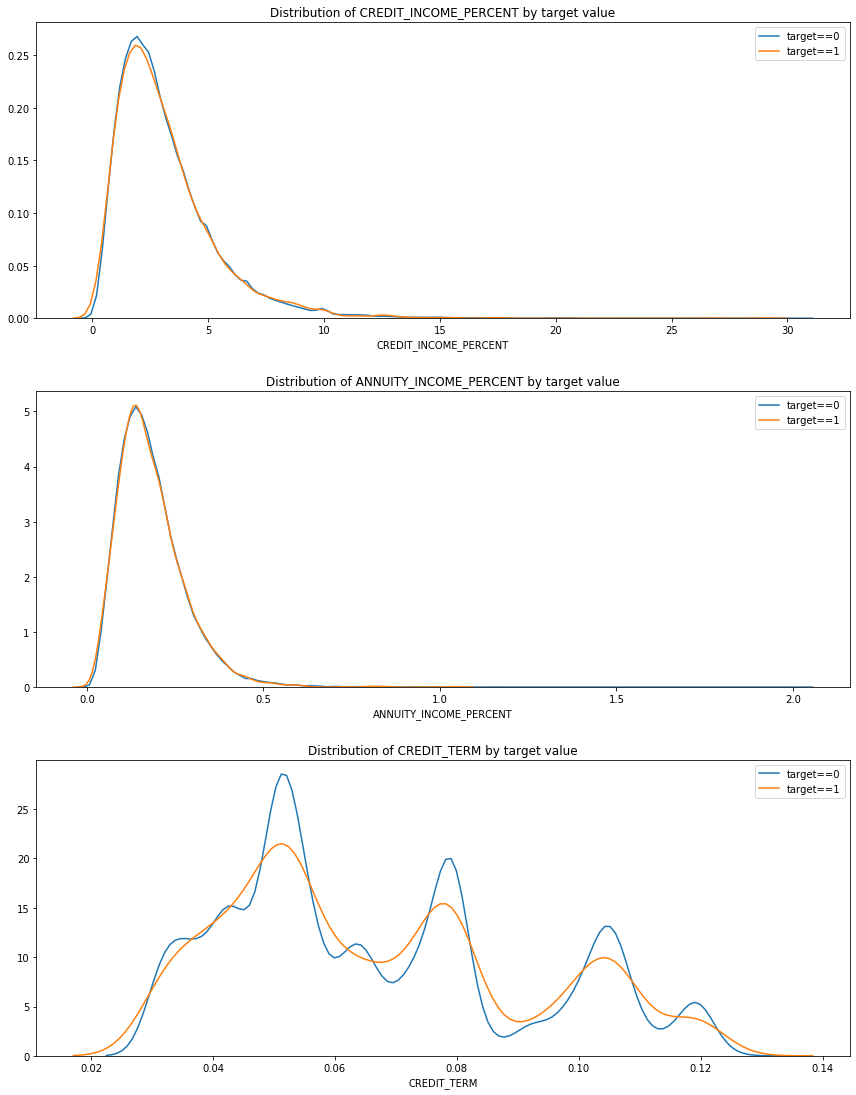

In [81]:
# Let us visually represent our above data
plt.figure(figsize=(12,20))
domainf['DAYS_EMPLOYED_PERCENT']=(domainf['DAYS_EMPLOYED_PERCENT']*-1)
for i,feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM']):
    plt.subplot(4,1,i+1)
    sns.kdeplot(domainf.loc[domainf['TARGET']==0,feature],label='target==0')
    sns.kdeplot(domainf.loc[domainf['TARGET']==1,feature],label='target==1')
    plt.title('Distribution of %s by target value' %feature)
    plt.xlabel('%s' %feature)
    plt.tight_layout(h_pad = 2.5)

# Baseline

# Logistic Regression Implementation

In [98]:
y=ctrain['TARGET']
X=ctrain.drop(columns=['TARGET'])

In [99]:
z=ctest
print(X.shape,'\n',z.shape)

(307511, 240) 
 (48744, 240)


In [100]:
from sklearn.preprocessing import Imputer,MinMaxScaler

im=Imputer(strategy='median')

im.fit(X)

X=im.transform(X)
z=im.transform(z)

C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [101]:
scaler=MinMaxScaler(feature_range=(0,1))

scaler.fit(X)

X=scaler.transform(X)

z=scaler.transform(z)

In [103]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=.0001)

lr.fit(X,y)

C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = lr.predict_proba(z)[:, 1]

In [139]:
# Submission dataframe
submit = ctest[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head(20)

C:\Users\Keshav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,TARGET
0,100001,0.087748
1,100005,0.163035
2,100013,0.109742
3,100028,0.076522
4,100038,0.155683
5,100042,0.072351
6,100057,0.107372
7,100065,0.144920
8,100066,0.061656
9,100067,0.120727


Text(0, 0.5, 'Count')

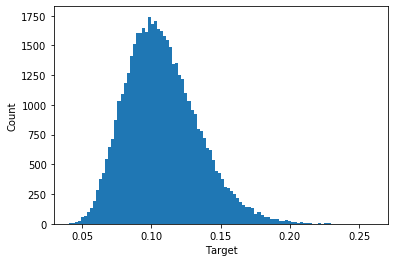

In [146]:
plt.hist(submit['TARGET'],bins=100)
plt.xlabel('Target')
plt.ylabel('Count')

In [118]:
# if we set threshhold as .5 

In [119]:
predict=lr.predict(z)

In [121]:
predict.sum()

0

# Improved Model: Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

randomforest=RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [125]:
randomforest.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [131]:
# Extract feature importances
feature_importance_value=randomforest.feature_importances_
features=list(A.columns)
featureimportance=pd.DataFrame({'features':features,'importance':feature_importance_value})

In [136]:
featureimportance.sort_values('importance',ascending=False)

,features,importance
32,EXT_SOURCE_2,4.979892e-02
33,EXT_SOURCE_3,4.672353e-02
10,DAYS_BIRTH,3.202673e-02
13,DAYS_ID_PUBLISH,3.195721e-02
12,DAYS_REGISTRATION,3.119284e-02
...,...,...
90,FLAG_DOCUMENT_10,5.648672e-07
92,FLAG_DOCUMENT_12,0.000000e+00
117,NAME_INCOME_TYPE_Businessman,0.000000e+00
15,FLAG_MOBIL,0.000000e+00


In [137]:
predictions=randomforest.predict_proba(z)[:,1]
predictions

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.1s finished


array([0.12, 0.3 , 0.13, ..., 0.08, 0.16, 0.27])

In [143]:
submit1=ctest[['SK_ID_CURR']]
submit1['Target']=predictions
submit1

C:\Users\Keshav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,Target
0,100001,0.12
1,100005,0.30
2,100013,0.13
3,100028,0.08
4,100038,0.16
...,...,...
48739,456221,0.20
48740,456222,0.25
48741,456223,0.08
48742,456224,0.16


Text(0, 0.5, 'Count')

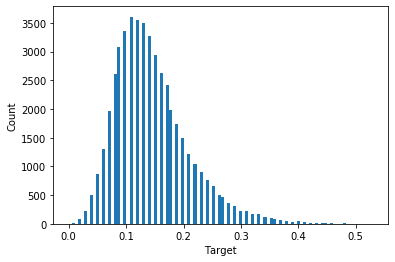

In [157]:
plt.hist(submit1['Target'],bins=100)
plt.xlabel('Target')
plt.ylabel('Count')

In [159]:
# polynomial and domain features are very bulky so we are not able to process properly